# **Shahid Ali**
*   FA24-RAI-015
*    Research Paper Link: https://www.al-kindipublisher.com/index.php/bjns/article/view/8009/6792

## Import Libraries


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')



## Data Understanding

*   Dataframe shape
*   Head and Tail
*   Data Types
*   Describe

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
train = pd.read_csv('/content/cardio_train.csv')

In [ ]:
train.shape

(70000, 13)

In [ ]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
train.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
# Convert age from days to years
train['age'] = (train['age'] / 365).astype(int)

In [ ]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
train.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
train.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [ ]:
train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
train.nunique()

,0
id,70000
age,28
gender,2
height,109
weight,287
ap_hi,153
ap_lo,157
cholesterol,3
gluc,3
smoke,2


In [ ]:
train['age'].unique()

array([50, 55, 51, 48, 47, 60, 61, 54, 40, 39, 45, 58, 59, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 44, 41, 29, 30])

In [ ]:
train.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
train['cardio'].value_counts()


,count
cardio,
0,35021
1,34979


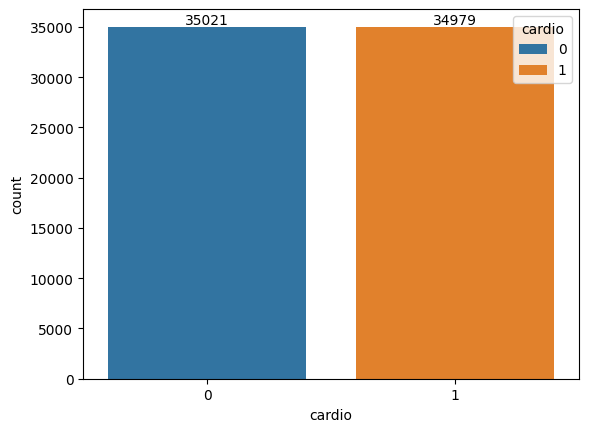

In [ ]:
count = sns.countplot(x='cardio', hue='cardio', data=train)
for i in count.containers:
  count.bar_label(i)
plt.show()

##Feature Understanding

*   Plotting Feature Distributions

  *   Barchart (Categorical Data)
  *   Histogram (Numerical Data)
  *   Boxplot (Numerical Data)

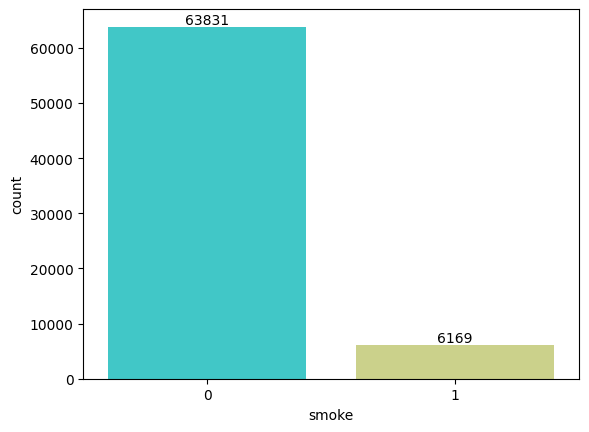

In [ ]:
count = sns.countplot(x='smoke',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()

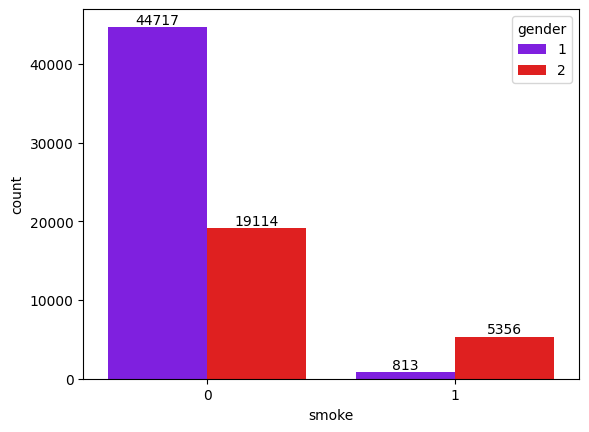

In [ ]:
count = sns.countplot(x='smoke',hue='gender',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()

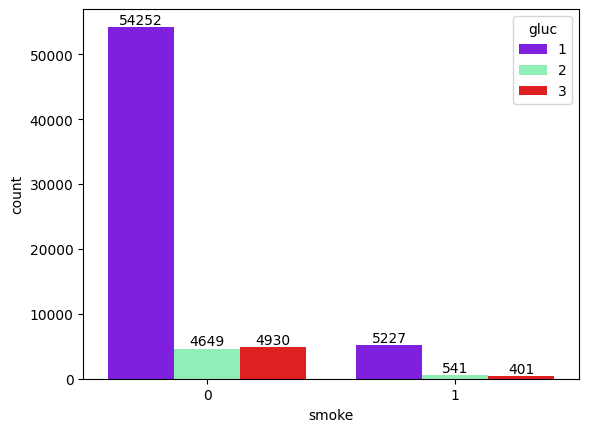

In [ ]:

count = sns.countplot(x='smoke',hue='gluc',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()


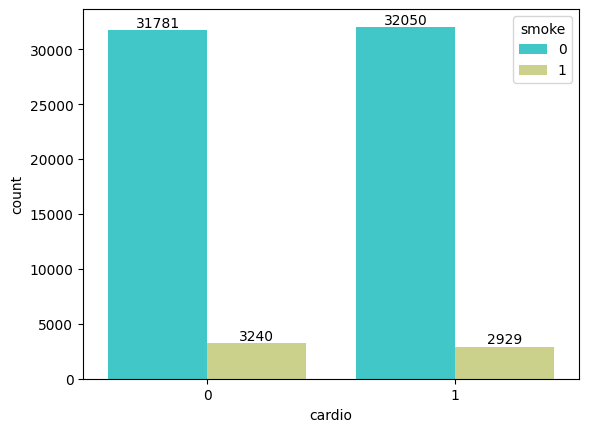

In [ ]:
count = sns.countplot(x='cardio',hue='smoke',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()





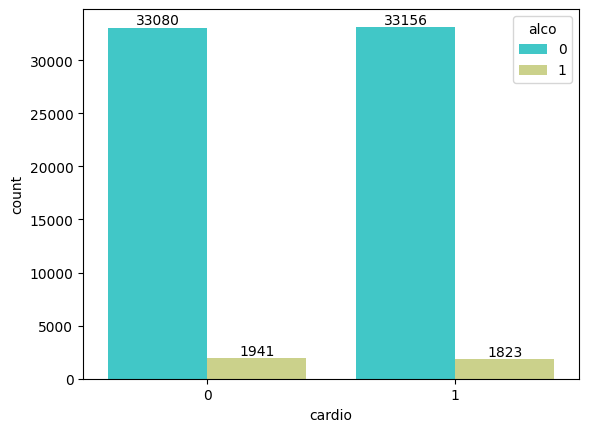

In [ ]:
count = sns.countplot(x='cardio',hue='alco',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()


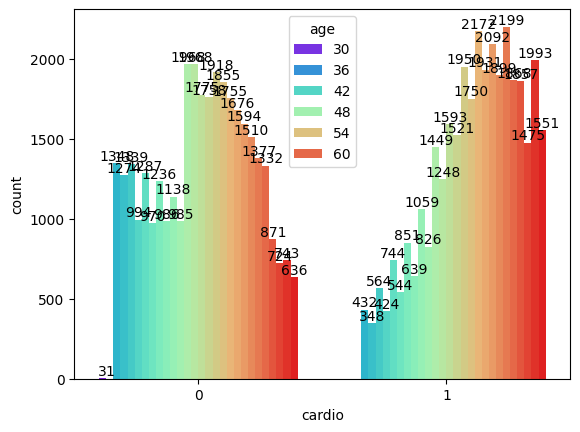

In [ ]:
count = sns.countplot(x='cardio',hue='age',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()


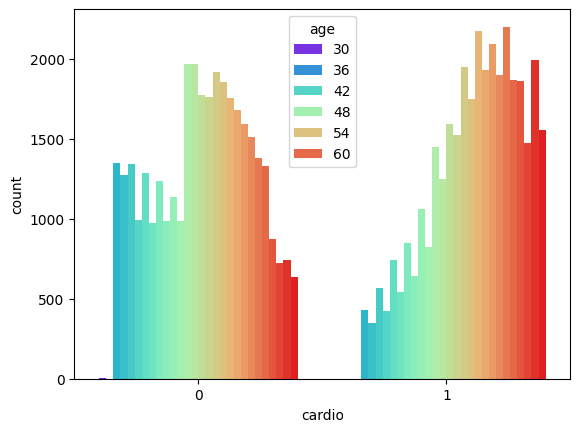

In [ ]:
count = sns.countplot(x='cardio',hue='age',data=train,palette='rainbow')


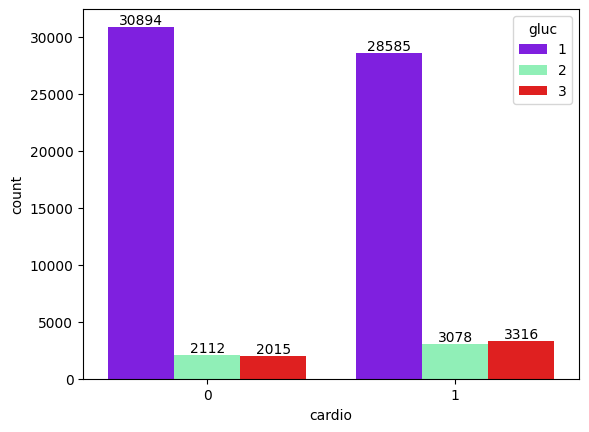

In [ ]:
count = sns.countplot(x='cardio',hue='gluc',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()


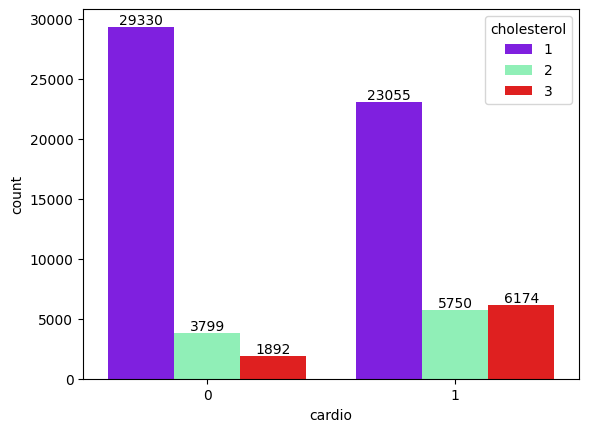

In [ ]:
count = sns.countplot(x='cardio',hue='cholesterol',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()


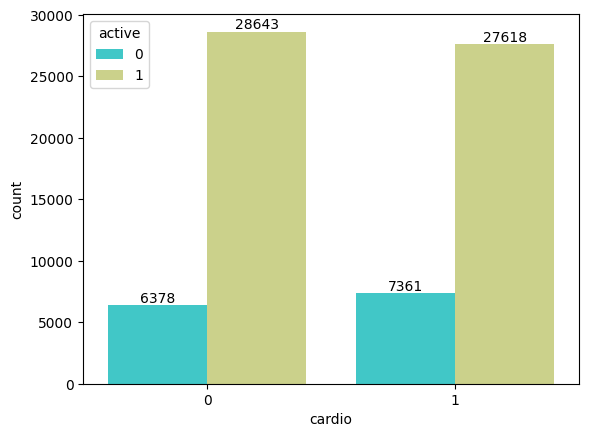

In [ ]:
count = sns.countplot(x='cardio',hue='active',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()


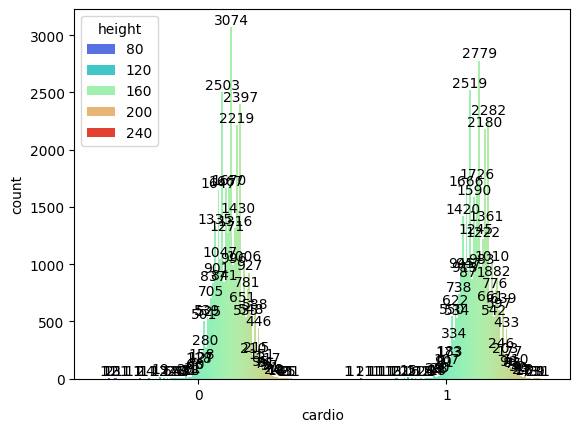

<Axes: xlabel='cardio', ylabel='count'>

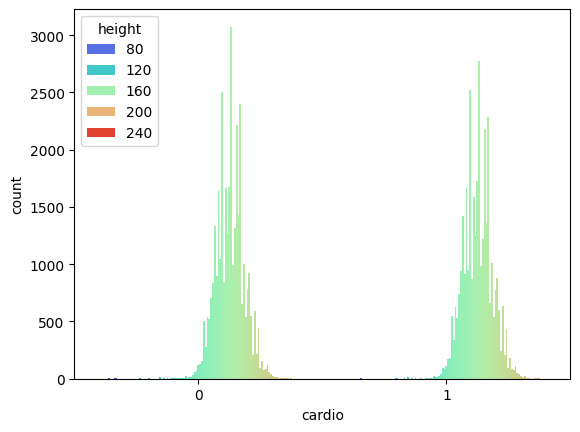

In [ ]:
count = sns.countplot(x='cardio',hue='height',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()
sns.countplot(x='cardio',hue='height',data=train,palette='rainbow')

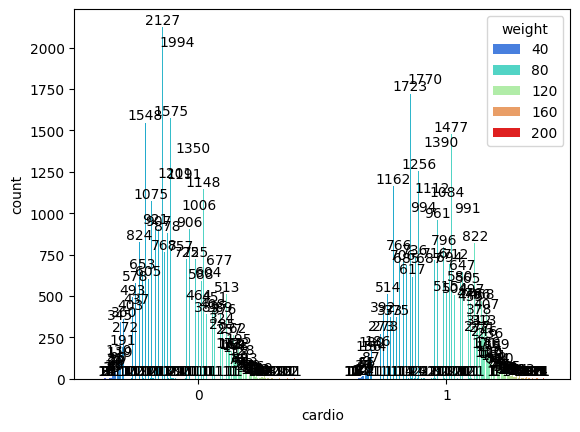

In [ ]:
count = sns.countplot(x='cardio',hue='weight',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()


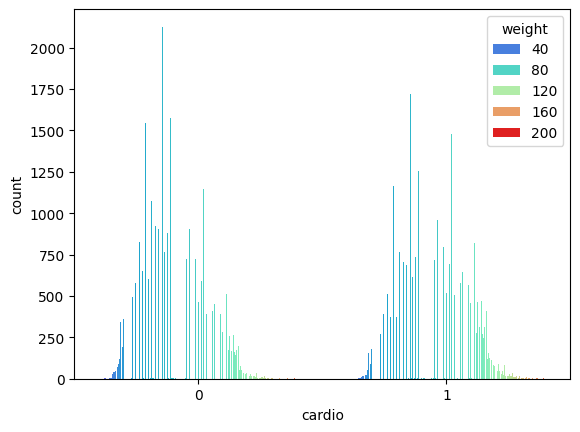

In [ ]:
count = sns.countplot(x='cardio',hue='weight',data=train,palette='rainbow')
plt.show()


<Axes: >

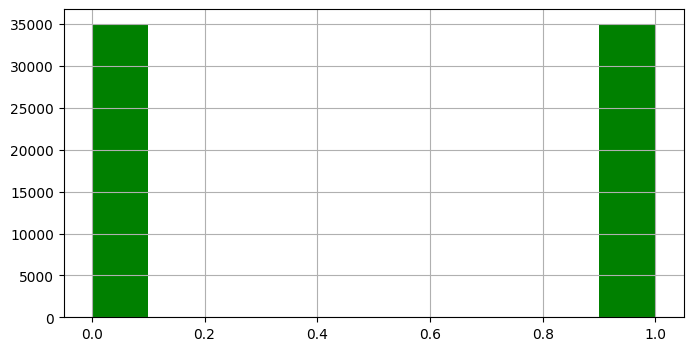

In [ ]:
train['cardio'].hist(color='green', figsize=(8,4))

<Axes: xlabel='age', ylabel='Count'>

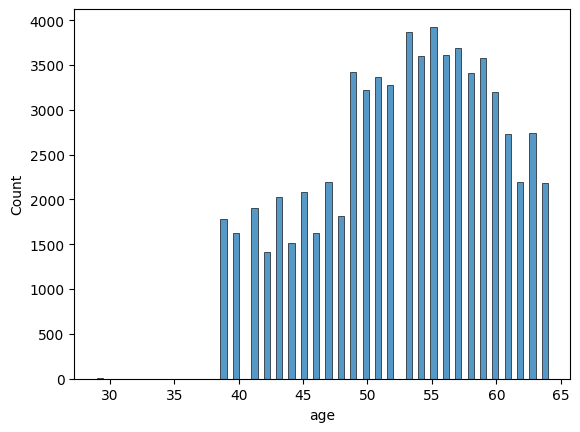

In [ ]:
sns.histplot(train['age'])

<Axes: xlabel='cardio', ylabel='age'>

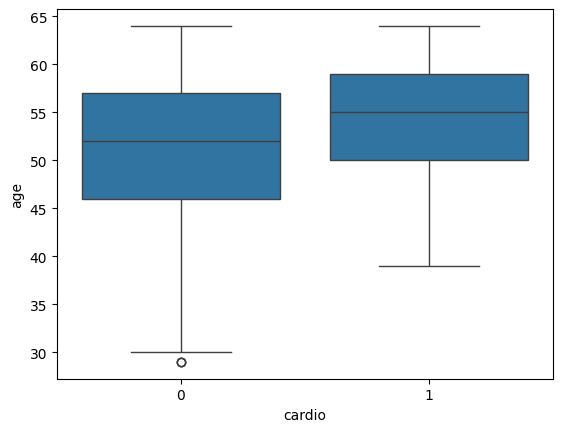

In [ ]:
sns.boxplot(y='age', x='cardio', data=train)

<Axes: xlabel='gender', ylabel='age'>

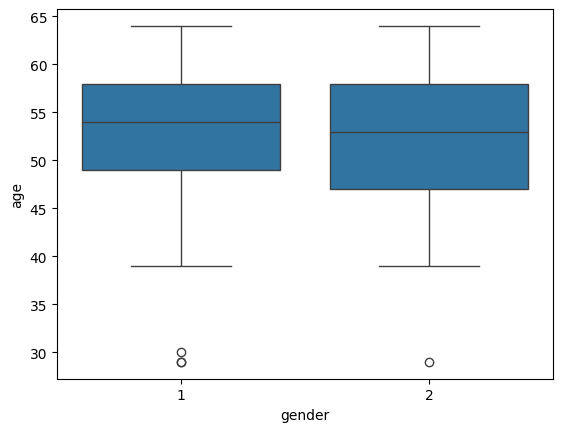

In [ ]:
sns.boxplot(y='age', x='gender', data=train)

# **Outlier Removal**

In [ ]:
#train = train[train['age'] <= 30]




<Axes: xlabel='cardio', ylabel='age'>

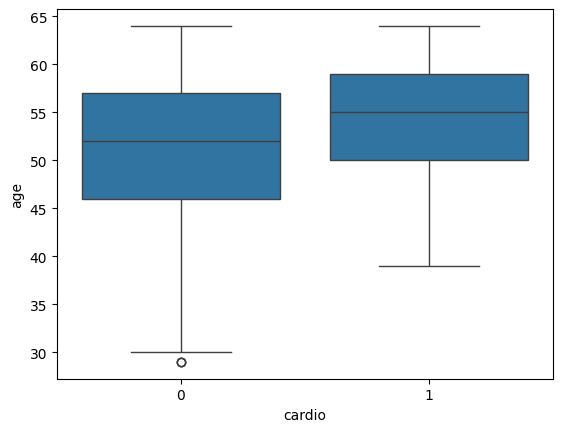

In [ ]:
sns.boxplot(y='age', x='cardio', data=train)

##Data Preparation

*   Dropping irrelevant columns and rows
*   Handling Missing Values
*   Identifying duplicated columns
*   Renaming Columns


Let's begin some exploratory data analysis! We'll start by dropping irrelevant columns

In [ ]:
train.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1


In [ ]:
train.drop(['id','height','weight'],axis=1,inplace=True)

In [ ]:
train.shape

(70000, 10)

In [ ]:
train.columns

Index(['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
train.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,110,80,1,1,0,0,1,0
1,55,1,140,90,3,1,0,0,1,1
2,51,1,130,70,3,1,0,0,0,1
3,48,2,150,100,1,1,0,0,1,1
4,47,1,100,60,1,1,0,0,0,0


## Data Imputation
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

In [ ]:
train.isnull().sum()

,0
age,0
gender,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0
active,0
cardio,0


<Axes: >

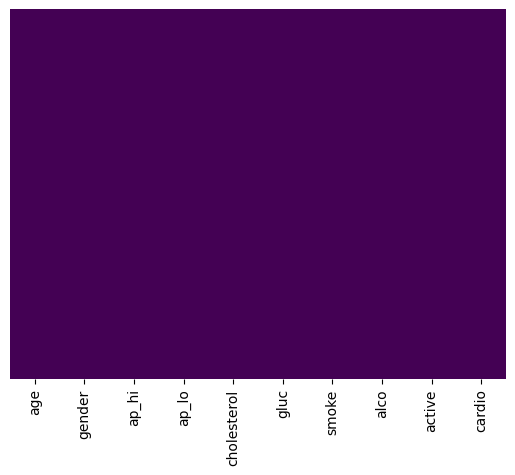

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,110,80,1,1,0,0,1,0
1,55,1,140,90,3,1,0,0,1,1
2,51,1,130,70,3,1,0,0,0,1
3,48,2,150,100,1,1,0,0,1,1
4,47,1,100,60,1,1,0,0,0,0


#Converting Categorical Features


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          70000 non-null  int64
 1   gender       70000 non-null  int64
 2   ap_hi        70000 non-null  int64
 3   ap_lo        70000 non-null  int64
 4   cholesterol  70000 non-null  int64
 5   gluc         70000 non-null  int64
 6   smoke        70000 non-null  int64
 7   alco         70000 non-null  int64
 8   active       70000 non-null  int64
 9   cardio       70000 non-null  int64
dtypes: int64(10)
memory usage: 5.3 MB


In [ ]:
#sex = pd.get_dummies(train['gender'],dtype=int)

In [ ]:
#train.head()

In [ ]:
#train = pd.concat([train,sex],axis=1)

In [ ]:
#train.head()

In [ ]:
#train.drop(['gender'],axis=1,inplace=True)

In [ ]:
#train.head()

In [ ]:
#train = train.rename(columns={1:'Male'})
#train = train.rename(columns={2:'Female'})

In [ ]:
#train.head()

In [ ]:
#train.head(2)

In [ ]:
#cholesterol	 = pd.get_dummies(train['cholesterol'],dtype=int)

In [ ]:
#train = pd.concat([train,cholesterol],axis=1)

In [ ]:
#train = train.rename(columns={1:'cholesterol	1',2:'cholesterol	2',3:'cholesterol	3'})

In [ ]:
#gluc = pd.get_dummies(train['gluc'],dtype=int)

In [ ]:
#train = pd.concat([train,gluc],axis=1)

In [ ]:
#train = train.rename(columns={'No':'AlcoholDrinking No','Yes':'AlcoholDrinking Yes'})

In [ ]:
#smoke = pd.get_dummies(train['smoke'],dtype=int)

In [ ]:
#train = pd.concat([train,smoke],axis=1)

In [ ]:
#train = train.rename(columns={0:'smoke No',1:'smoke Yes'})

In [ ]:
#train.head()

In [ ]:
#alco = pd.get_dummies(train['alco'],dtype=int)

In [ ]:
#train = pd.concat([train,alco],axis=1)

In [ ]:
#train.head()

In [ ]:
#train.head()

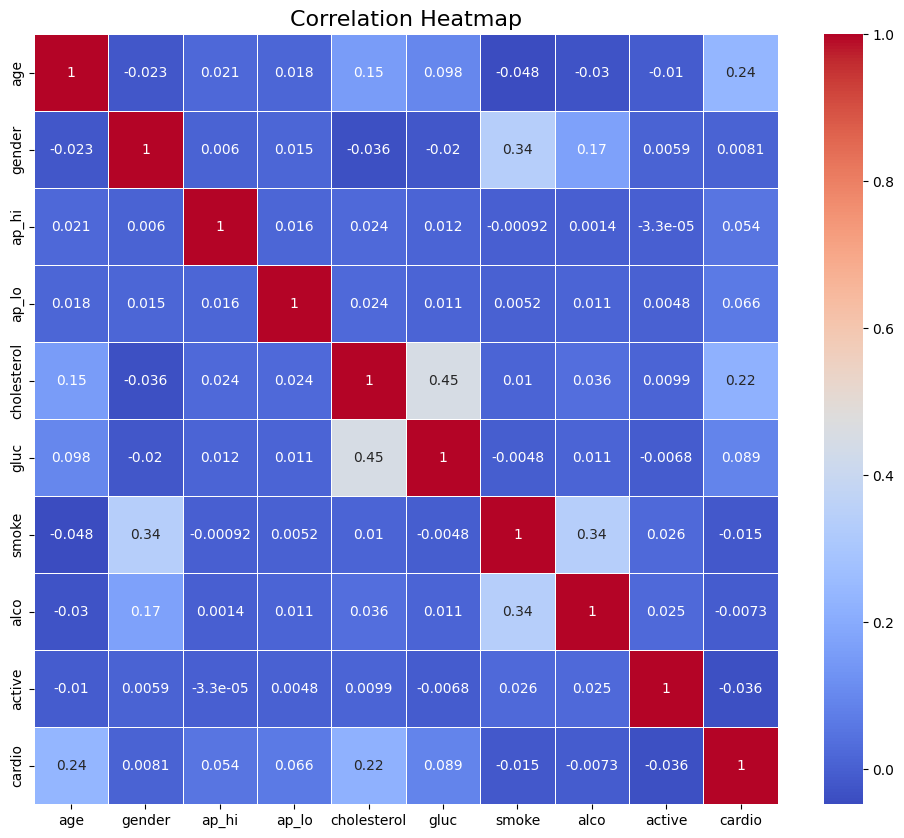

In [ ]:
# Correlation Heatmap for All Variables
plt.figure(figsize=(12, 10))
correlation = train.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

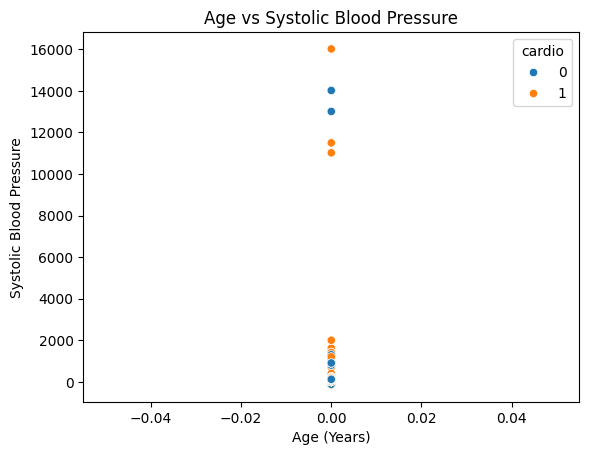

In [ ]:
# Scatter plot for age and systolic blood pressure
sns.scatterplot(x=(train['age'] / 365).astype(int), y=train['ap_hi'], hue=train['cardio'])
plt.title("Age vs Systolic Blood Pressure")
plt.xlabel("Age (Years)")
plt.ylabel("Systolic Blood Pressure")
plt.show()

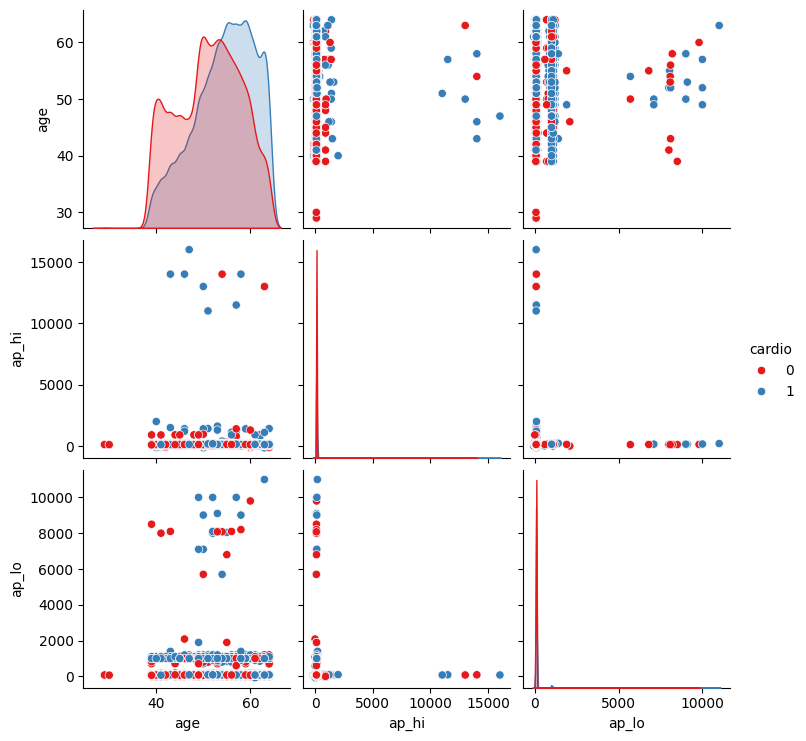

In [ ]:
# Pairplot for key variables
sns.pairplot(train[['age', 'ap_hi', 'ap_lo', 'cardio']], hue="cardio", palette="Set1")
plt.show()

In [ ]:
# Custom function for preprocessing
def custom_preprocessing(X):
    X = X.copy()
    # Convert 'age' in days to 'age_years'
    X['age_years'] = (X['age'] / 365).astype(int)
    # Clip extreme values for blood pressure
    X['ap_hi'] = np.clip(X['ap_hi'], 90, 200)
    X['ap_lo'] = np.clip(X['ap_lo'], 60, 120)
    return X.drop(columns=['age'])  # Drop unnecessary columns

# Create FunctionTransformer
custom_transformer = FunctionTransformer(custom_preprocessing)

In [ ]:
# Define numerical and categorical features
numerical_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_features = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
            ('scaler', StandardScaler())  # Scale numerical features
        ]), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ]
)


In [ ]:
# Full preprocessing pipeline
#pipeline = Pipeline(steps=[
 #   ('custom', custom_transformer),      # Apply custom preprocessing
  #  ('preprocessor', preprocessor)       # Apply ColumnTransformer
#])


In [ ]:


# Apply pipeline
#X = train.drop(columns=['cardio'])  # Features
#y = train['cardio']  # Target variable
#X_preprocessed = pipeline.fit_transform(X)

#print("Preprocessed Data Shape:", X_preprocessed.shape)


In [ ]:
# Handle class imbalance using SMOTE
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Check class distribution after SMOTE
#print("\nClass Distribution After SMOTE:")
#print(pd.Series(y_resampled).value_counts())

# Split into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
X = train.drop(['cardio'],axis=1)
y = train['cardio']

Training Logistic Regression...
Logistic Regression:
Accuracy: 0.7127
Confusion Matrix:
[[5284 1720]
 [2302 4694]]
ROC-AUC: 0.7775
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000





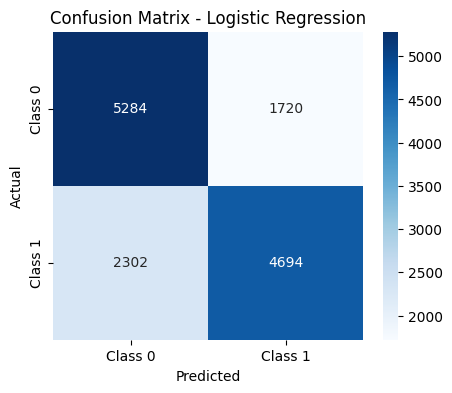

Training Support Vector Classifier...
Support Vector Classifier:
Accuracy: 0.7220
Confusion Matrix:
[[5341 1663]
 [2229 4767]]
ROC-AUC: 0.7809
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      7004
           1       0.74      0.68      0.71      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000





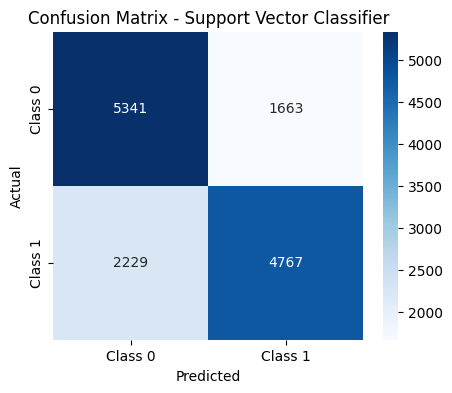

Training Random Forest...
Random Forest:
Accuracy: 0.7113
Confusion Matrix:
[[5257 1747]
 [2295 4701]]
ROC-AUC: 0.7663
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000





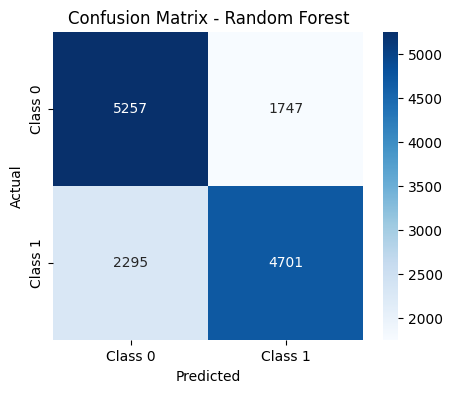

Training Gradient Boosting...
Gradient Boosting:
Accuracy: 0.7309
Confusion Matrix:
[[5367 1637]
 [2130 4866]]
ROC-AUC: 0.7979
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7004
           1       0.75      0.70      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000





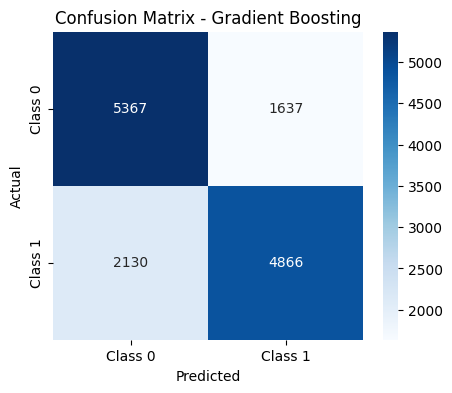

Training Naive Bayes...
Naive Bayes:
Accuracy: 0.5794
Confusion Matrix:
[[6243  761]
 [5128 1868]]
ROC-AUC: 0.6709
              precision    recall  f1-score   support

           0       0.55      0.89      0.68      7004
           1       0.71      0.27      0.39      6996

    accuracy                           0.58     14000
   macro avg       0.63      0.58      0.53     14000
weighted avg       0.63      0.58      0.53     14000





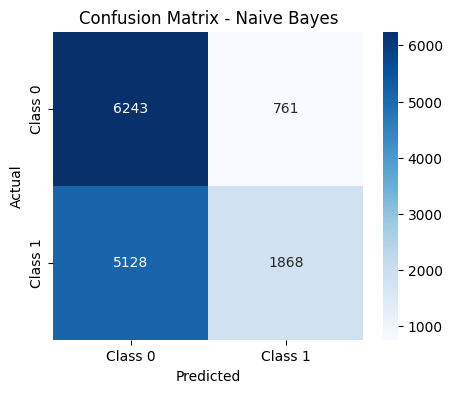

Training K-Nearest Neighbors...
K-Nearest Neighbors:
Accuracy: 0.6929
Confusion Matrix:
[[4898 2106]
 [2194 4802]]
ROC-AUC: 0.7409
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      7004
           1       0.70      0.69      0.69      6996

    accuracy                           0.69     14000
   macro avg       0.69      0.69      0.69     14000
weighted avg       0.69      0.69      0.69     14000





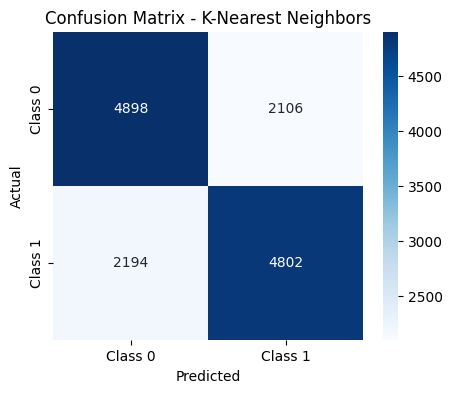

Training Decision Tree...
Decision Tree:
Accuracy: 0.6946
Confusion Matrix:
[[5376 1628]
 [2648 4348]]
ROC-AUC: 0.7264
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      7004
           1       0.73      0.62      0.67      6996

    accuracy                           0.69     14000
   macro avg       0.70      0.69      0.69     14000
weighted avg       0.70      0.69      0.69     14000





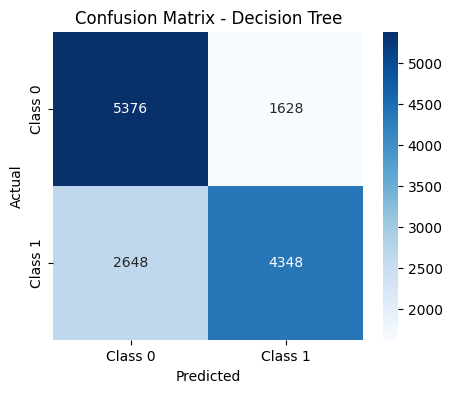

Training XGBoost...
XGBoost:
Accuracy: 0.7306
Confusion Matrix:
[[5374 1630]
 [2141 4855]]
ROC-AUC: 0.7958
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7004
           1       0.75      0.69      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000





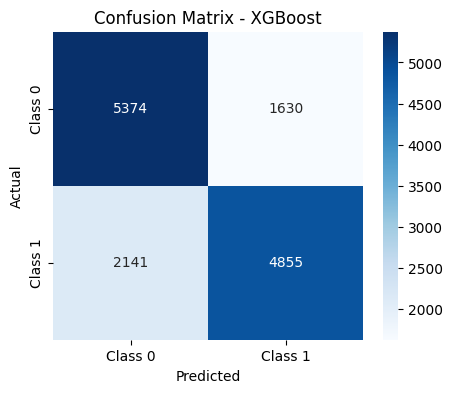

Training AdaBoost...
AdaBoost:
Accuracy: 0.7279
Confusion Matrix:
[[5577 1427]
 [2383 4613]]
ROC-AUC: 0.7915
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      7004
           1       0.76      0.66      0.71      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000





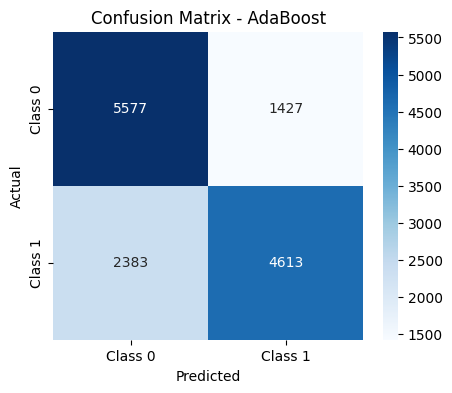

Summary of Results:
                       Model  Accuracy   ROC-AUC
0        Logistic Regression  0.712714  0.777493
1  Support Vector Classifier  0.722000  0.780931
2              Random Forest  0.711286  0.766347
3          Gradient Boosting  0.730929  0.797876
4                Naive Bayes  0.579357  0.670907
5        K-Nearest Neighbors  0.692857  0.740896
6              Decision Tree  0.694571  0.726426
7                    XGBoost  0.730643  0.795841
8                   AdaBoost  0.727857  0.791490


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix # Import confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier()
}

# Train and evaluate each classifier
results = []
for name, clf in classifiers.items():
    print(f"Training {name}...")
    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({"Model": name, "Accuracy": accuracy, "ROC-AUC": roc_auc})

    # Print metrics
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    if y_prob is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n" + "=" * 50 + "\n")

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Display summarized results
results_df = pd.DataFrame(results)
print("Summary of Results:")
print(results_df)
